In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]

df = pd.read_csv('seeds_dataset.txt', names=cols, sep="\s+")

In [7]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

Clustering

In [9]:
from sklearn.cluster import KMeans

x1 = 'compactness'
x2 = 'asymmetry'

X = df[[x1, x2]].values

In [10]:
kmeans = KMeans(n_clusters=3).fit(X)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

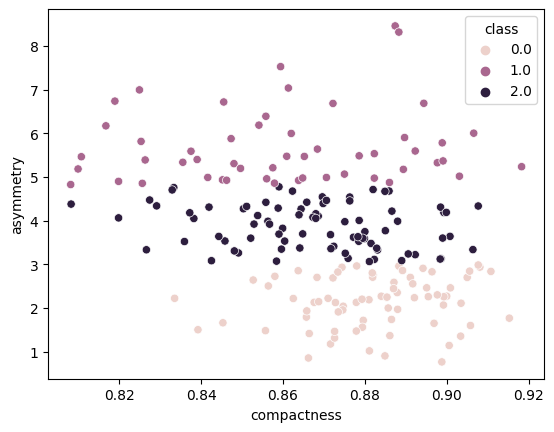

In [11]:
clusters = kmeans.labels_

cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x1, x2, 'class'])

sns.scatterplot(x=x1, y=x2, hue='class', data=cluster_df)
plt.plot()

Higher Dimensions

In [29]:
X = df[cols[:-1]].values
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

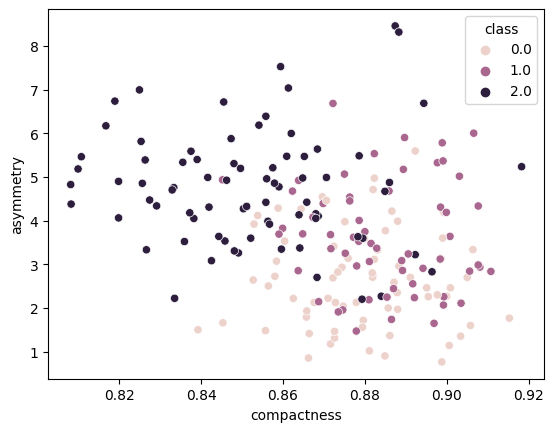

In [27]:
sns.scatterplot(x=x1, y=x2, hue='class', data=cluster_df)
plt.plot()

PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

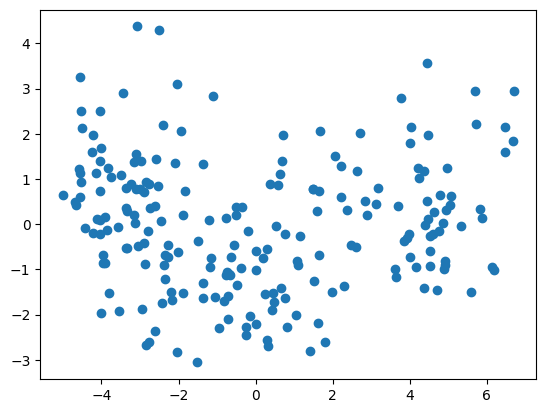

In [15]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])

In [16]:
kmeans_pca_df = pd.DataFrame(
    np.hstack((transformed_x,
               kmeans.labels_.reshape(-1, 1)
               )), columns=['pca1', 'pca2', 'class'])

truth_pca_df = pd.DataFrame(
    np.hstack((transformed_x,
               df['class'].values.reshape(-1, 1)
               )), columns=['pca1', 'pca2', 'class'])

[]

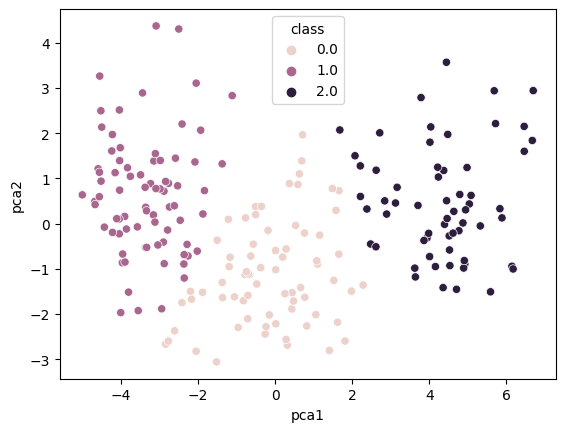

In [17]:
sns.scatterplot(x='pca1', y='pca2', hue='class', data=kmeans_pca_df)
plt.plot()

[]

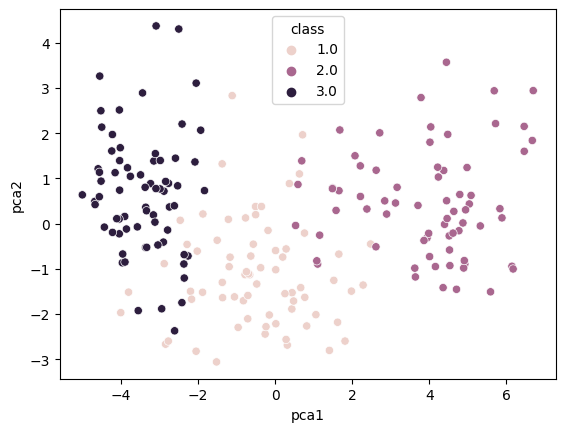

In [18]:
sns.scatterplot(x='pca1', y='pca2', hue='class', data=truth_pca_df)
plt.plot()